# Import Libraries

In [1]:
# importing analytics and visualisation libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# importing data
path = '/Users/tannu/Desktop/Data Analytics/Instacart Basket Analysis Dec-2025 '
df_latest = pd.read_pickle(os.path.join(path, '2 Data', 'Prepared Data', 'ords_prods_merge_group.pkl'))

# Visualizations

## Bar Chart

<Axes: xlabel='orders_day_of_the_week'>

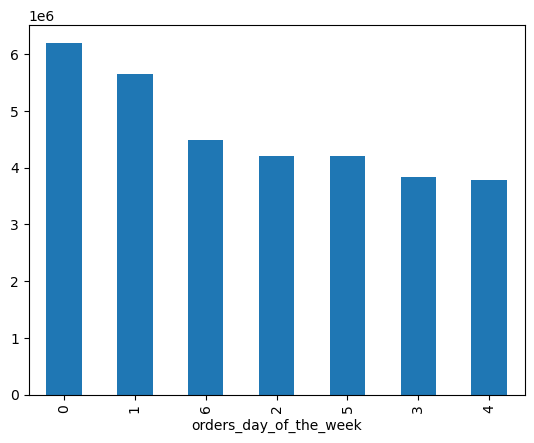

In [4]:
# plotting a bar chart
df_latest['orders_day_of_the_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

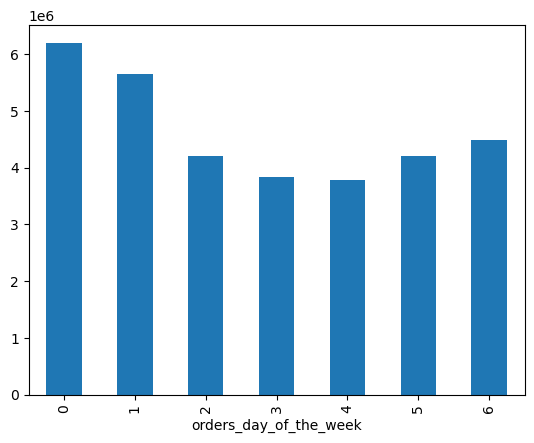

In [5]:
# plotting a bar chart with sorting based on indexing
df_latest['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

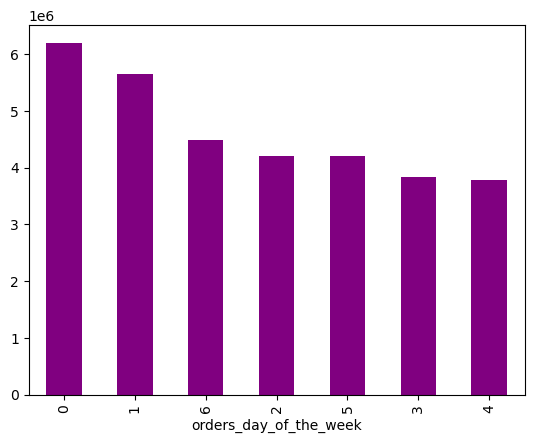

In [6]:
df_latest['orders_day_of_the_week'].value_counts().plot.bar(color = ['purple'])

Text(0.5, 1.0, 'Order Frequency on Days of Week')

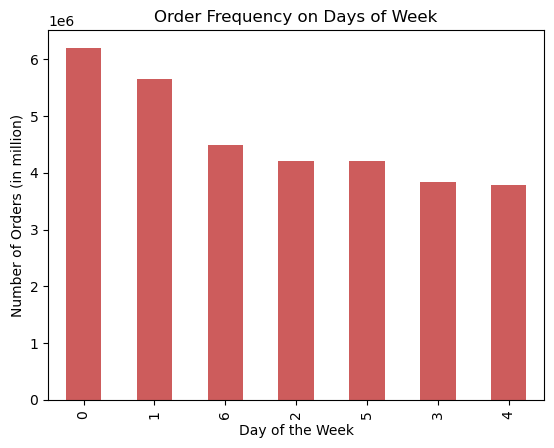

In [3]:
# saving this chart into Jupyter's memory by the object name 'bar'
bar = df_latest['orders_day_of_the_week'].value_counts().plot.bar(color = ['indianred'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders (in million)')
plt.title('Order Frequency on Days of Week')

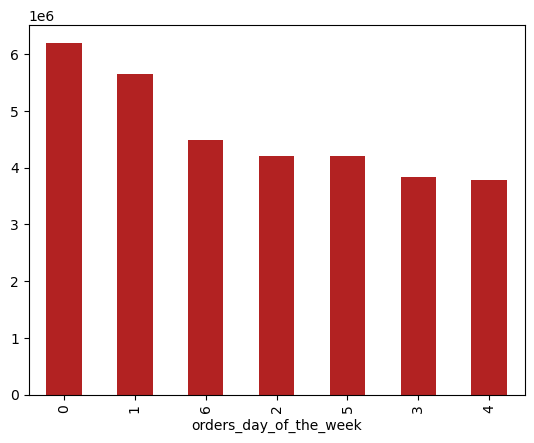

In [13]:
# recalling the saved object 'bar' from Jupyter's memory
bar.figure

In [4]:
# exporting this bar chart
bar.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histogram

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

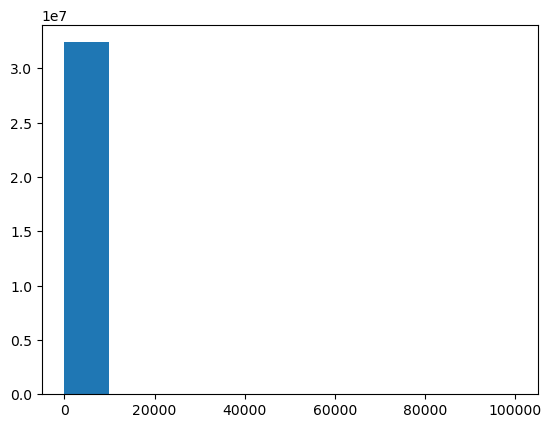

In [15]:
# plotting a histogram
df_latest['prices'].plot.hist(bin = 25)

In [16]:
# checking the data in 'prices' column to assess why the histogram has not yielded 25 bins as requested
df_latest['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
df_latest['prices'].mean()

np.float64(11.980225638383427)

In [18]:
df_latest['prices'].median()

7.4

In [19]:
df_latest['prices'].max()

99999.0

#### The max value seems off for an instacart app. We will try plotting a scatterplot to assess outliers.

## Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

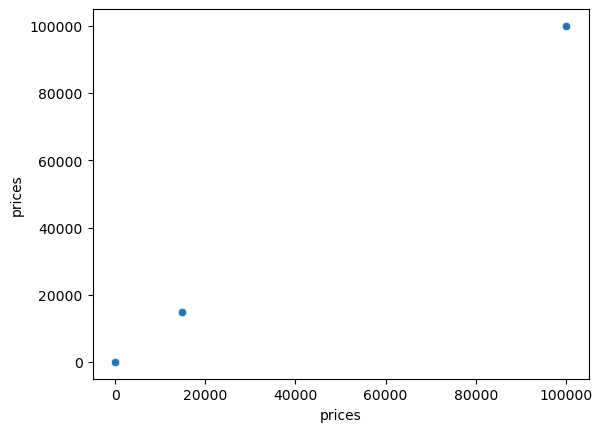

In [20]:
# plotting a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_latest)

In [22]:
df_latest.loc[df_latest['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,...,_merge,price_range,busiest_day,busiest_hours,max_order,loyalty_flag,average_spent,spending_flag,order_frequency,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,both,High-range product,Regularly Busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,both,High-range product,Regularly Busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,both,High-range product,Regularly Busy,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,both,High-range product,Busiest Day,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,both,High-range product,Regularly Busy,Average Orders,16,Regular Customer,114.426619,High Spender,23.0,Non-frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,both,High-range product,Busiest Day,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,both,High-range product,Busiest Day,Most Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,both,High-range product,Regularly Busy,Most Orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent Customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,both,High-range product,Regularly Busy,Average Orders,12,Regular Customer,1178.381871,High Spender,12.0,Regular Customer


In [5]:
# clearing these prices are a mistake so we'll replace them with NaN
df_latest.loc[df_latest['prices'] > 100, 'prices'] = np.nan

In [6]:
# checking for maximum price again to see if nan values are assigned to the variable for the condition specified
df_latest['prices'].max()

25.0

<Axes: ylabel='Frequency'>

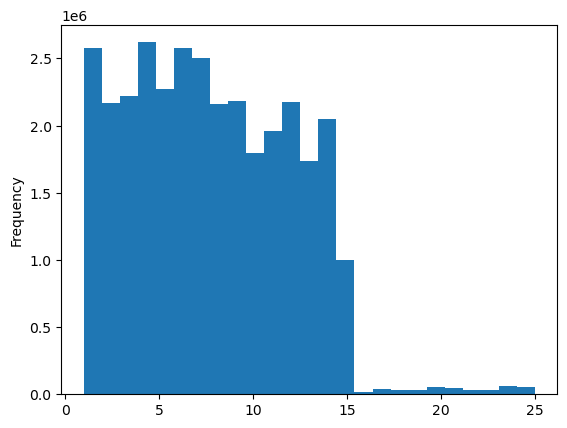

In [26]:
df_latest['prices'].plot.hist(bins = 25)

Text(0.5, 1.0, 'Order Frequency By Price')

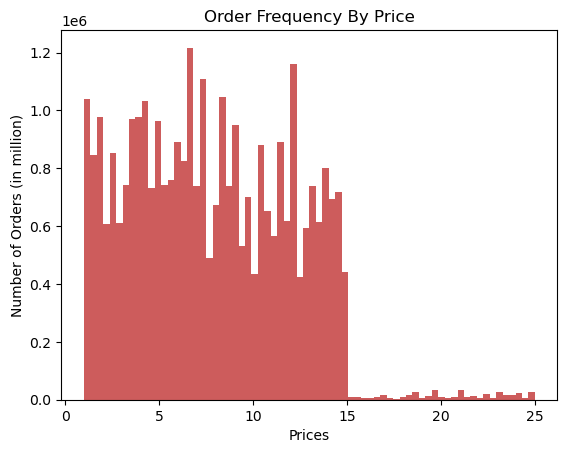

In [7]:
hist = df_latest['prices'].plot.hist(bins = 70, color = ['indianred'])
plt.xlabel('Prices')
plt.ylabel('Number of Orders (in million)')
plt.title('Order Frequency By Price')

In [8]:
# exporting this histogram 
hist.figure.savefig(os.path.join(path, '4 analysis', 'Visualizations', 'hist_order_prices.png'))

## Sampling

In [9]:
# create a list holding True/False values to the test np.random.rand( ) <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_latest)) <= 0.7

In [32]:
dev

array([False,  True, False, ...,  True,  True,  True], shape=(32404859,))

In [10]:
# Store 70% of the sample in the dataframe 'big'

big = df_latest[dev]

In [11]:
# Store 30% of the sample in the dataframe 'small'

small = df_latest[~dev]

In [35]:
# checking the creation of two dataframes 'big' & 'small'

len(df_latest)

32404859

In [36]:
len(big)+len(small)

32404859

In [12]:
# reducing the size of the dataframe by keeping only those columns that we require

df_2 = small[['orders_day_of_the_week','prices']]

## Line Chart

Text(0.5, 1.0, 'Relationship of Expenditure & Day of Week')

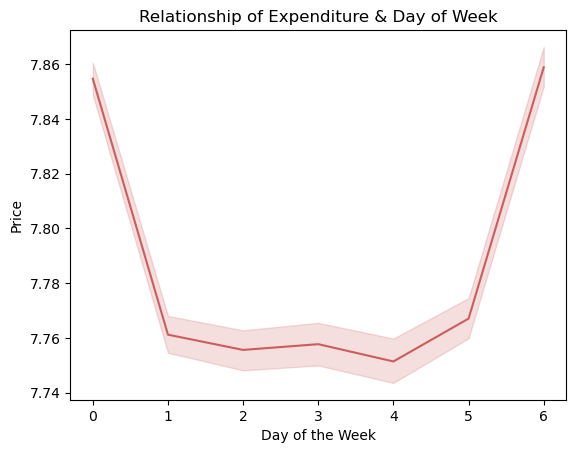

In [13]:
# plotting a line chart on 'orders_day_of_the_week' & 'prices' and saving the chart in 'line' object

line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices', color = 'indianred')
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.title('Relationship of Expenditure & Day of Week')

In [14]:
# exporting this line chart 

line.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'line_orders_dow_prices.png'))